<a href="https://colab.research.google.com/github/AmoghUpadhayay/Machine-Learning-Projects/blob/main/Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## get the data
!wget https://www.gutenberg.org/files/1661/1661-0.txt -o book.txt

In [ ]:
## open the file saved in 1661-0.txt,'r' = opens the file for reading
## utf-8 stands for unicode transformation format - 8 bits 
text=open('1661-0.txt','r',encoding='utf-8').read()
text=text.lower()

In [ ]:
sentences=text.split('\n')

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
##out of vocab = Unknown

tokenizer=Tokenizer(num_words=None,oov_token='<UNK>')
tokenizer.fit_on_texts(sentences)

In [ ]:
## gives dictionary
vocab_size=len(tokenizer.word_index)+1
vocab_size

8915

In [ ]:
## creating sequences from sentences
sequences=tokenizer.texts_to_sequences(sentences)

In [ ]:
## getting n gram sequences that is making more sequences without disturbing the order

input_sequences=[]
for sequence in sequences:
  for i in range(1,len(sequence)):
    n_gram_sequence=sequence[:i+1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[0],input_sequences[1])

[4775, 145] [4775, 145, 132]


In [ ]:
## finding len of max sequence
max_seq_len=max([len(seq) for seq in input_sequences])
max_seq_len

20

In [ ]:
## padding to make sure sequences are of same lengths
padded_sequences=pad_sequences(input_sequences,maxlen=max_seq_len)
print(padded_sequences[0],padded_sequences[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 4775  145] [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 4775  145  132]


In [ ]:
import numpy as np
padded_sequences=np.array(padded_sequences)

In [ ]:
x=padded_sequences[:,:-1]
labels=padded_sequences[:,-1]

In [ ]:
y=tf.keras.utils.to_categorical(labels,num_classes=vocab_size)

In [ ]:
print(x.shape,y.shape)

(101575, 19) (101575, 8915)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential([
    Embedding(vocab_size,100,input_length=max_seq_len-1),
    Bidirectional(LSTM(256)),
    Dense(vocab_size,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           891500    
                                                                 
 bidirectional (Bidirectiona  (None, 512)              731136    
 l)                                                              
                                                                 
 dense (Dense)               (None, 8915)              4573395   
                                                                 
Total params: 6,196,031
Trainable params: 6,196,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
es=EarlyStopping(monitor='acc',min_delta=0.01,patience=10)

In [ ]:
model.fit(x,y,epochs=50,batch_size=512,verbose=1,callbacks=[es])

Epoch 1/50
199/199 [==============================] - 12s 35ms/step - loss: 6.2099 - acc: 0.0840
Epoch 2/50
199/199 [==============================] - 7s 35ms/step - loss: 5.2944 - acc: 0.1434
Epoch 3/50
199/199 [==============================] - 7s 35ms/step - loss: 4.7578 - acc: 0.1731
Epoch 4/50
199/199 [==============================] - 7s 35ms/step - loss: 4.2413 - acc: 0.2027
Epoch 5/50
199/199 [==============================] - 7s 35ms/step - loss: 3.7349 - acc: 0.2468
Epoch 6/50
199/199 [==============================] - 7s 36ms/step - loss: 3.2945 - acc: 0.2964
Epoch 7/50
199/199 [==============================] - 7s 35ms/step - loss: 2.9165 - acc: 0.3521
Epoch 8/50
199/199 [==============================] - 7s 35ms/step - loss: 2.6231 - acc: 0.3997
Epoch 9/50
199/199 [==============================] - 7s 35ms/step - loss: 2.3793 - acc: 0.4415
Epoch 10/50
199/199 [==============================] - 7s 35ms/step - loss: 2.1865 - acc: 0.4774
Epoch 11/50
199/199 [=================

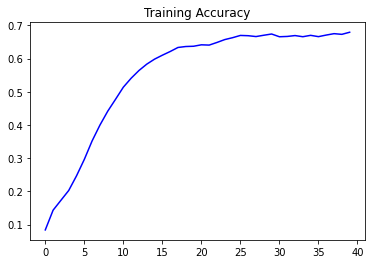

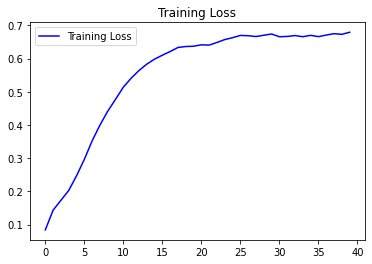

In [ ]:
import matplotlib.pyplot as plt

history=model.history
acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.title("Training Accuracy")

plt.figure()

plt.plot(epochs,acc,'b',label='Training Loss')
plt.title("Training Loss")
plt.legend()